#https://ocw.unican.es/pluginfile.php/2001/course/section/2333/PR11_Extremos.pdf
Dada la función $f(x,y)=x^2y+y^2-4xy+2y+10$ en el dominio $D$ dado el triángulo $T$ de vértices $A(2,0)$, $B(4,3)$ y $C(0,2)$, se pide:

a) Representar la superficie en un rectángulo que contenga el triángulo $T$

b) Calcular los extremos de $f$ y determinar cuáles de ellos se encuentran en el interior de $T$

c) Representar en el dominio el segmento que uno los puntos $A$ y $B$ y su imagen por $f$. ¿Cuál es el valor máximo y mínimo que toma la función sobre el segmento?

d) Representar en el dominio el segmento que uno los puntos $A$ y $B$ y su imagen por $T$. ¿Cuál es el valor máximo y mínimo que toma la función sobre este segmento?

e) Representar en el dominio el segmento que une los puntos $C$ y $A$ y su imagen en $T$. ¿Cuál es el valor máximo y mínimo que toma la función sobre este segmento?

f) ¿Cuál es el valor máximo y mínimo que toma la función $T$ si se considera como domino el triángulo $R$?

Using matplotlib backend: TkAgg
(Point2D(2, 0), Point2D(4, 3), Point2D(0, 2))


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/usr/lib/python3/dist-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7fc66890f160>
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.

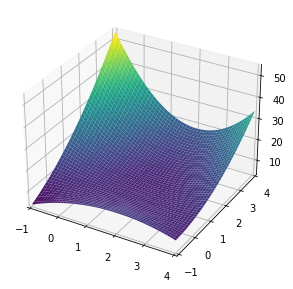

In [9]:
#a)
%matplotlib 
import sympy as sp
x,y=sp.symbols('x,y')
f=x**2*y+y**2-4*x*y+2*y+10
from sympy.plotting import plot3d
#Representacion grafica
fig=plot3d(f,(x,-1,4),(y,-1,4),alpha=0.2)
p1=sp.Point3D(2,0)
p2=sp.Point3D(4,3)
p3=sp.Point3D(0,2)
t=sp.Triangle(p1,p2,p3)
#l1,l2,l3=sp.Line3D(p1,p2),sp.Line(p2,p3),sp.Line(p3,p1)
print(t.vertices)
#Estaría bien dibujar el triángulo

In [2]:
#b) 
#Gradiente
grad=[sp.diff(f,c) for c in [x,y]]
print ("Gradiente= ",grad)
#Puntos criticos
ec=[sp.Eq(grad[k],0) for k in range(0,len(grad))]
print(ec)
pc=sp.solve(ec,(x,y))
print('Ptos criticos= ', pc) #Hay 3 puntos críticos
#Comprobamos los ptos críticos que caen dentro del triángulo
pc_in=[]
for pto in pc:
    val= t.encloses_point(pto) #Devuelve True si el punto está dentro
    print(val)
    if (val ==True):pc_in.append(pto)


#Dos modos de calcular la matriz Hessiana
#Hessiana
#Modo 1
H=[]
for df in grad:
    H.append([sp.diff(df,c) for c in [x,y]]   )
print(H)
#Modo 2
fx,fy=grad
fx2=[sp.diff(fx,c) for c in [x,y]]
fy2=[sp.diff(fy,c) for c in [x,y]]
H=sp.Matrix([[sp.diff(fx,c), sp.diff(fy,c)] for c in [x,y]])
print(H)
detH=H.det()
print("Matriz Hessina= ", H)
print("Determinante Matriz Hessiana= ", detH)


Gradiente=  [2*x*y - 4*y, x**2 - 4*x + 2*y + 2]
[Eq(2*x*y - 4*y, 0), Eq(x**2 - 4*x + 2*y + 2, 0)]
Ptos criticos=  [(2, 1), (2 - sqrt(2), 0), (sqrt(2) + 2, 0)]
True
False
False
[[2*y, 2*x - 4], [2*x - 4, 2]]
Matrix([[2*y, 2*x - 4], [2*x - 4, 2]])
Matriz Hessina=  Matrix([[2*y, 2*x - 4], [2*x - 4, 2]])
Determinante Matriz Hessiana=  -4*x**2 + 16*x + 4*y - 16


In [3]:
def criterio_df2(detH,pto):
    val_det=detH.subs([(x,pto[0]),(y,pto[1])])
    fxx=H[0,0].subs([(x,pto[0]),(y,pto[1])])
    #print("val_det= ",val_det)
    #print("fxx= ", fxx)
    if (val_det>0 and fxx>0):
        print("El punto ", pto, " es un máximo local")
    elif(val_det>0 and fxx<0):
        print("El punto ", pto, " es un mínimo local")
    elif(val_det<0):
        print("El punto ", pto," no es un extremo relativo")
    else: 
        print("el criterio no decide")

In [4]:
for pto in pc_in:
    criterio_df2(detH,pto)

El punto  (2, 1)  es un máximo local


4*t**2 + 2*t*(2*t + 2)**2 - 8*t*(2*t + 2) + 4*t + 10


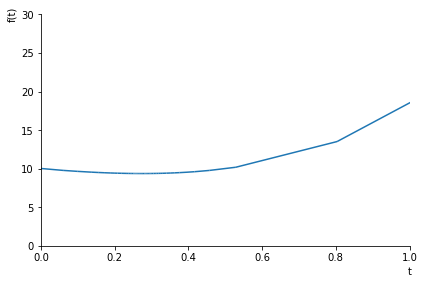

In [5]:
#c)
#Parametrizamos el segmento que pasa por (2,0) y (4,2)
t=sp.symbols('t')
#no crea una tupla, para extraer cada termino
#h=(1-t)*(2,0)+t*(4,2) #parametrizacion de la recta
#print(h)
g=f.subs( [(x,(1-t)*2+t*4),(y,(1-t)*0+t*2)   ] )
print(g)
#g=f.subs([(x,2+t*2),(y,0+t*2)])
#print(g)
sp.plot(g,xlim=(0,1),ylim=(0,30))

In [6]:
#Derivada de g
dg=sp.diff(g,t)
print(dg)
#puntos criticos de g
pc=sp.solve(dg)
print(pc)
#valor de los puntos criticos
val=[(g.subs(t,p)).evalf() for p in pc]
print(val)

2*t*(8*t + 8) - 24*t + 2*(2*t + 2)**2 - 12
[-1/6 + sqrt(7)/6, -sqrt(7)/6 - 1/6]
[9.36886969055910, 12.1126117909224]


32*t + 2*(4 - 4*t)**2 - 14


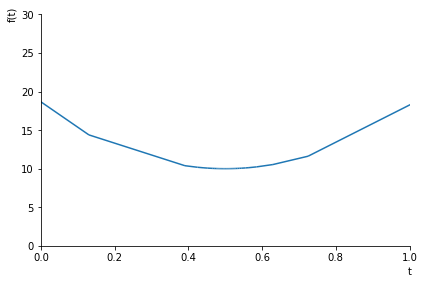

In [7]:
#d)
#Parametrizamos el segmento que pasa por (4,2) y (0,2)
t=sp.symbols('t')

g=f.subs( [(x,(1-t)*4+t*0),(y,(1-t)*2+t*2)   ] )
print(g)
#g=f.subs([(x,2+t*2),(y,0+t*2)])
#print(g)
sp.plot(g,xlim=(0,1),ylim=(0,30))

In [8]:
#Derivada de g
dg=sp.diff(g,t)
print(dg)
#puntos criticos de g
pc=sp.solve(dg)
print(pc)
#valor de los puntos criticos
val=[(g.subs(t,p)).evalf() for p in pc]
print(val)

64*t - 32
[1/2]
[10.0000000000000]
